# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

<Figure size 432x288 with 0 Axes>

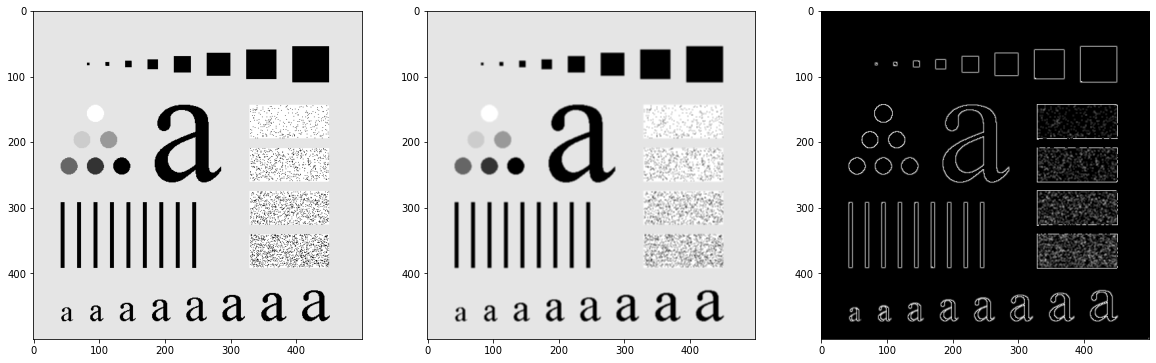

In [60]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from scipy import signal


# Obrazki
if not os.path.exists("jet.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png --no-check-certificate
if not os.path.exists("kw.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png --no-check-certificate
if not os.path.exists("moon.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/moon.png --no-check-certificate
if not os.path.exists("lenaSzum.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaSzum.png --no-check-certificate
if not os.path.exists("lena.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lena.png --no-check-certificate
if not os.path.exists("plansza.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/plansza.png --no-check-certificate


I = cv2.imread('plansza.png')           
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.gray()

kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(I,-1,kernel)



f, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20,20)) 
ax1.imshow(I)
ax2.imshow(dst)
ax3.imshow(abs(I-dst))

# na kręwedziach są rozmycia, a moduł z odejmowania je uwidacznia


5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

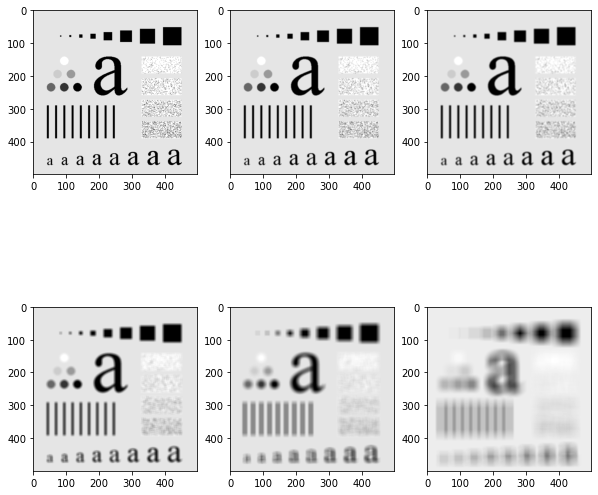

In [62]:
def averageFilter(Img, size):
    kernel = np.ones((size,size),np.float32)/(size*size)
    dst = cv2.filter2D(Img,-1,kernel)
    return dst
f, ([ax1, ax2,ax3],[ax4,ax5,ax6]) = plt.subplots(2,3, figsize=(10,10)) 
ax1.imshow(I)#orinalny
ax2.imshow(averageFilter(I,3))
ax3.imshow(averageFilter(I,5))
ax4.imshow(averageFilter(I,9))
ax5.imshow(averageFilter(I,15))
ax6.imshow(averageFilter(I,35))

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

<Figure size 432x288 with 0 Axes>

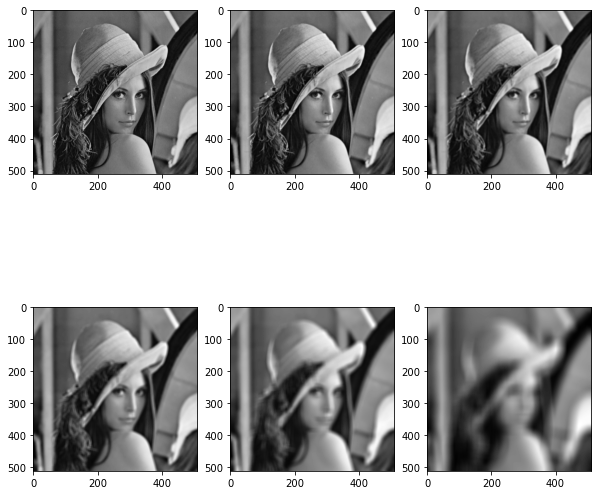

In [61]:
I2 = cv2.imread('lena.png')           
I2 = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)
plt.gray()

f, ([ax1, ax2,ax3],[ax4,ax5,ax6]) = plt.subplots(2,3, figsize=(10,10)) 
ax1.imshow(I2)#orinalny
ax2.imshow(averageFilter(I2,3))
ax3.imshow(averageFilter(I2,5))
ax4.imshow(averageFilter(I2,9))
ax5.imshow(averageFilter(I2,15))
ax6.imshow(averageFilter(I2,35))

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

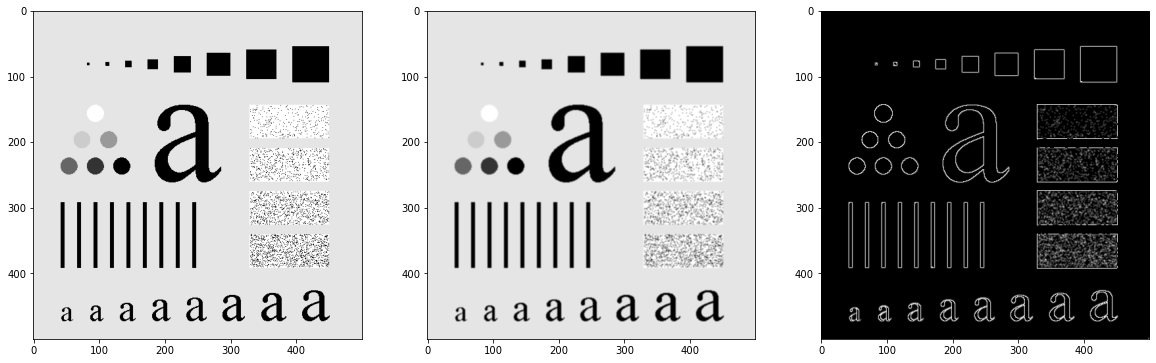

In [44]:
def averageFilterWithMask(Img):
    M = np.array([[1, 2, 1] ,[2, 4 ,2] ,[1 ,2 ,1]])
    M = M/sum(sum(M))
    dst = cv2.filter2D(I,-1,M)
    return dst

f, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20,20)) 
ax1.imshow(I)
ax2.imshow(averageFilterWithMask(dst))
ax3.imshow(abs(I-dst))



8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


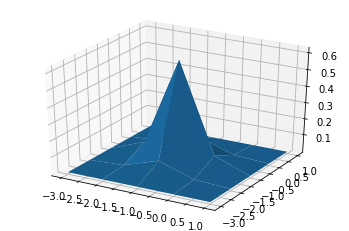

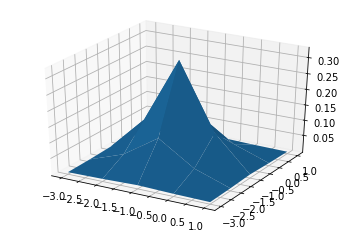

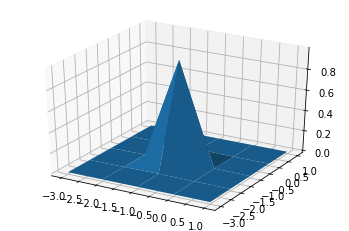

In [40]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()
    
gaussianMask1 = fgaussian(5,0.5)
mesh(gaussianMask1,5)

gaussianMask2 = fgaussian(5,0.7)
mesh(gaussianMask2,5)

gaussianMask3 = fgaussian(5,0.3)
mesh(gaussianMask3,5)


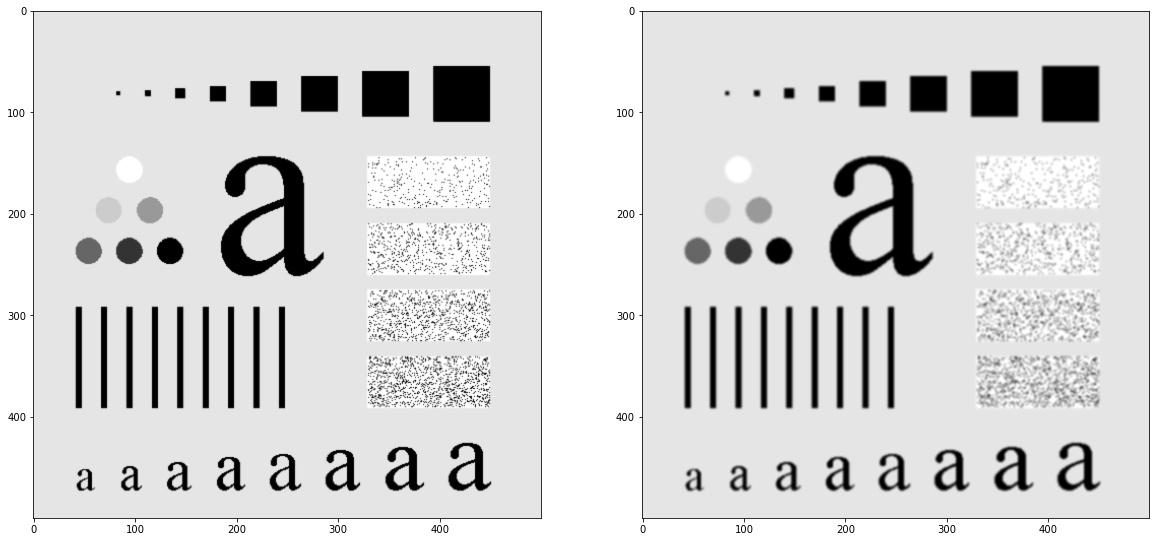

In [166]:
dst1 = cv2.GaussianBlur(I,(5,5),0) 

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,20)) 
ax1.imshow(averageFilterWithGaussianMask(I,5,gaussianMask1))
ax2.imshow(dst1)

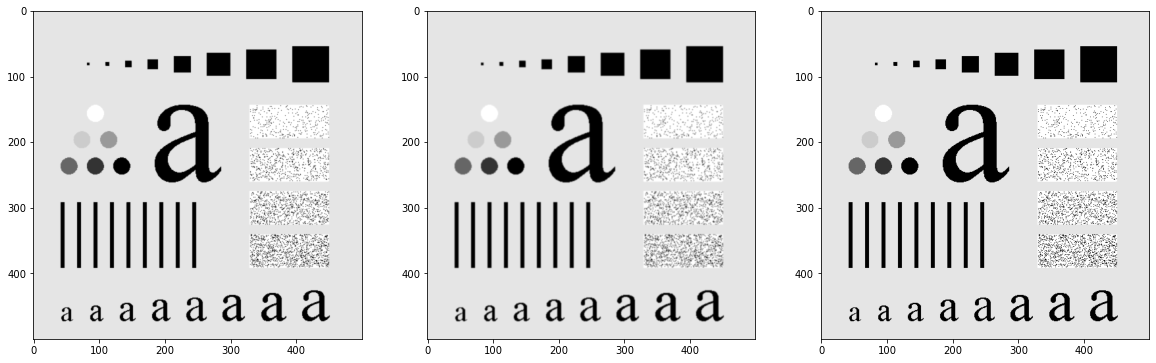

In [167]:
def averageFilterWithGaussianMask(Img, size ,mask):
    dst = cv2.filter2D(Img,-1,mask)
    return dst

f, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20,20)) 
ax1.imshow(averageFilterWithGaussianMask(I,5,gaussianMask1))
ax2.imshow(averageFilterWithGaussianMask(I,5,gaussianMask2))
ax3.imshow(averageFilterWithGaussianMask(I,5,gaussianMask3))

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


<Figure size 432x288 with 0 Axes>

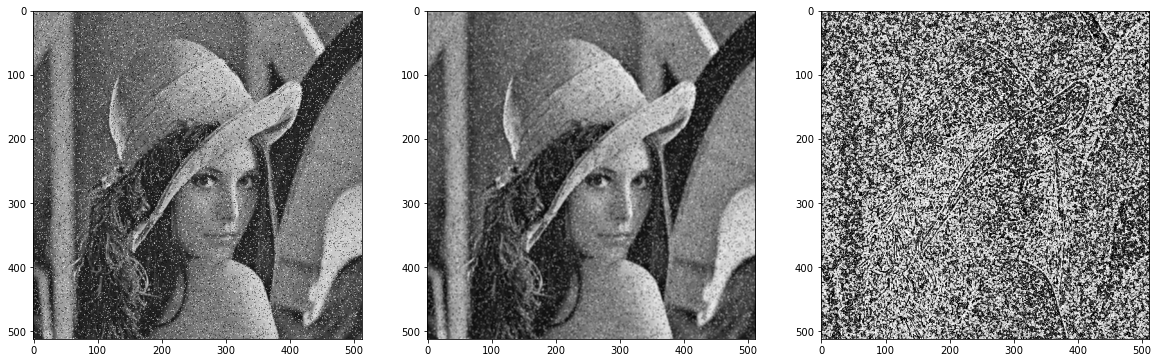

In [46]:
I3 = cv2.imread('lenaSzum.png')           
I3 = cv2.cvtColor(I3, cv2.COLOR_BGR2GRAY)
plt.gray()

kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(I3,-1,kernel)



f, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20,20)) 
ax1.imshow(I3)
ax2.imshow(dst)
ax3.imshow(abs(I3-dst))

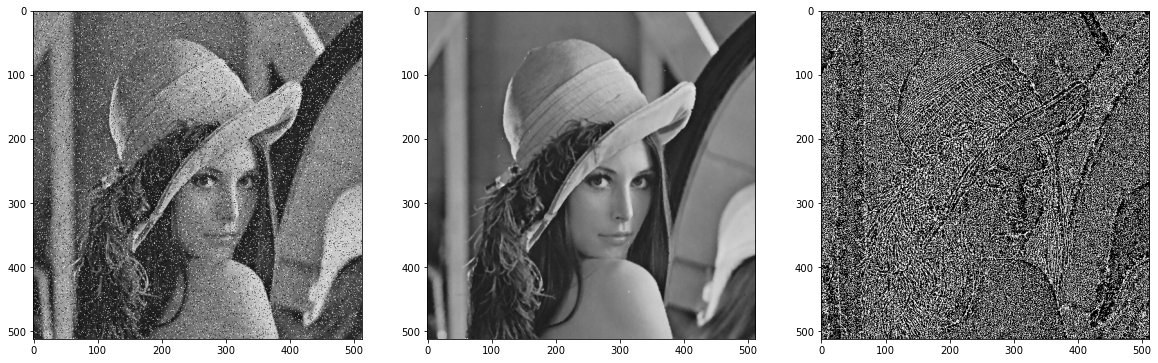

In [47]:
dst2 = cv2.medianBlur(I3,3)

f, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20,20)) 
ax1.imshow(I3)
ax2.imshow(dst2)
ax3.imshow(abs(I3-dst2))

# lepiej radzi sobie filtracja medianowa

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

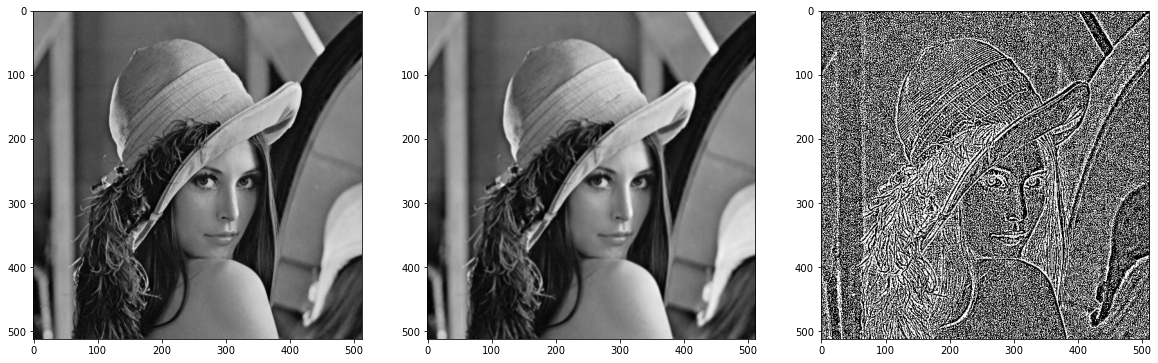

In [48]:
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(I2,-1,kernel)

f, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20,20)) 
ax1.imshow(I2)
ax2.imshow(dst)
ax3.imshow(abs(I2-dst))

<Figure size 432x288 with 0 Axes>

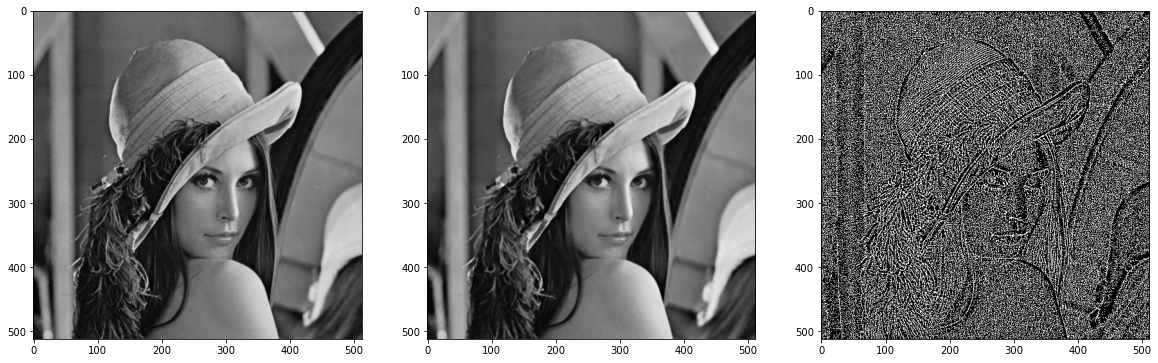

In [50]:
I2 = cv2.imread('lena.png')           
I2 = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)
plt.gray()


dst2 = cv2.medianBlur(I2,3)

f, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20,20)) 
ax1.imshow(I2)
ax2.imshow(dst2)
ax3.imshow(abs(I2-dst2))


3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

<Figure size 432x288 with 0 Axes>

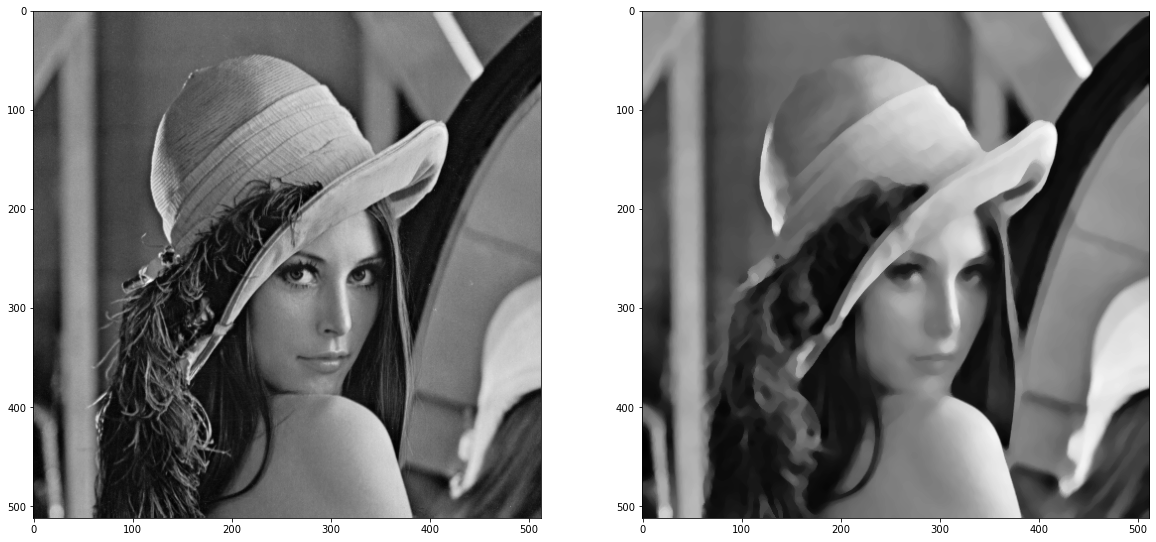

In [125]:
imgLena = cv2.imread('lena.png')           
imgLena = cv2.cvtColor(imgLena, cv2.COLOR_BGR2GRAY)
plt.gray()

for i in range (10):
    newImgLena = cv2.medianBlur(imgLena,5) 
    imgLena = newImgLena
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,20)) 
ax1.imshow(I2)
ax2.imshow(newImgLena)


## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

<Figure size 432x288 with 0 Axes>

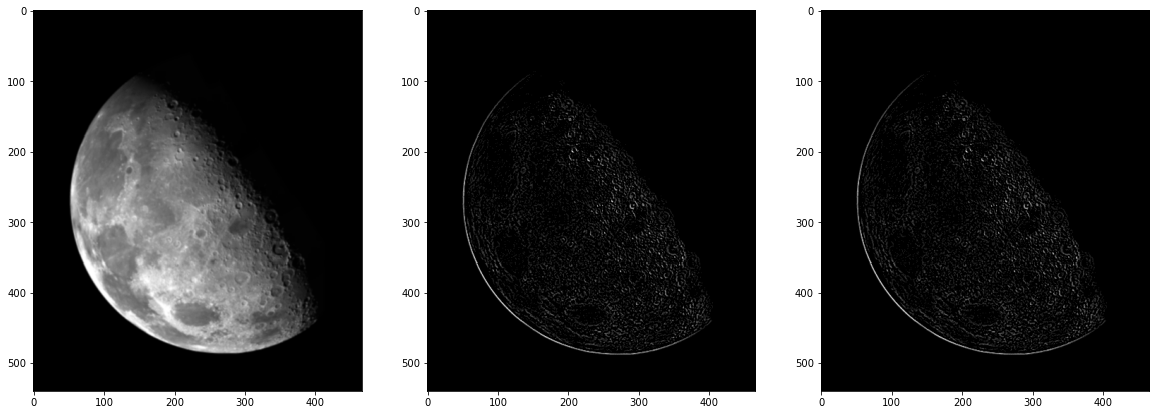

In [131]:
imgMoon= cv2.imread('moon.png')           
imgMoon = cv2.cvtColor(imgMoon, cv2.COLOR_BGR2GRAY)
plt.gray()

M = np.array([[0, 1, 0] ,[1, -4 ,1] ,[0 ,1 ,0]])/9

dst = cv2.filter2D(imgMoon,-1,M)

f, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20,20)) 
ax1.imshow(imgMoon)
ax2.imshow(dst + 128)
ax3.imshow(abs(dst))

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



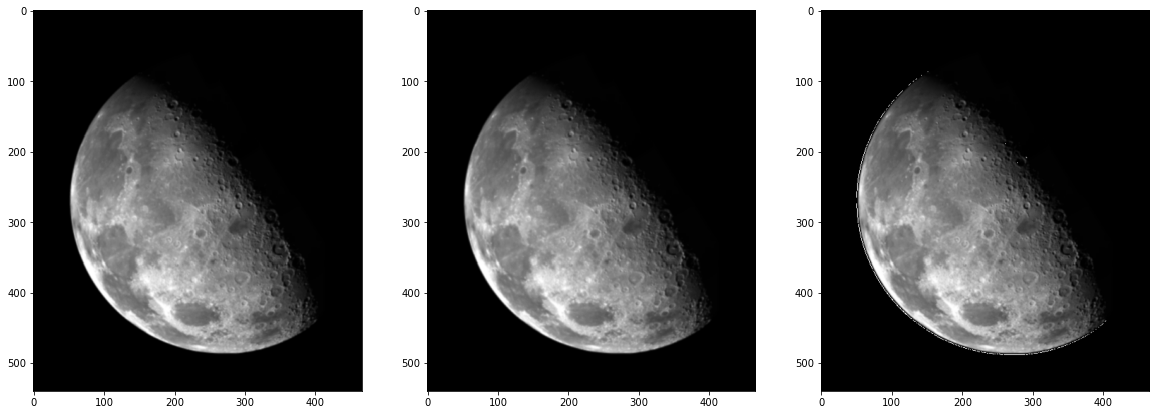

In [151]:
f, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20,20)) 
ax1.imshow(imgMoon)
ax2.imshow(dst+imgMoon)
ax3.imshow(abs(imgMoon-dst))

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

In [147]:
def calculateLap(img, mask):
    dst = cv2.filter2D(img,-1,mask)
    f, (ax1, ax2,ax3,ax4) = plt.subplots(1,4, figsize=(10,10)) 
    ax1.imshow(dst + 128)
    ax2.imshow(abs(dst)) 
    ax3.imshow(dst+img)
    ax4.imshow(abs(img-dst))

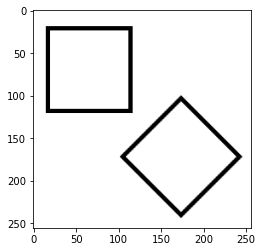

In [163]:
imgKw = cv2.imread('kw.png')           
imgKw = cv2.cvtColor(imgKw, cv2.COLOR_BGR2GRAY)
plt.gray()

plt.imshow(imgKw)

R1 = np.array([[0, 0, 0] ,[-1, 0 ,0] ,[0 ,1 ,0]])/9
R2 = np.array([[0, 0, 0] ,[0, 0 ,-1] ,[0 ,1 ,0]])/9

P1 = np.array([[-1, 0, 1] ,[-1, 0 ,1] ,[-1 ,0 ,1]])/9
P2 = np.array([[-1, -1, -1] ,[0, 0 , 0] ,[1 ,1 ,1]])/9

S1 = np.array([[-1, 0, 1] ,[-2, 0 ,2] ,[-1 , 0 ,1]])/9
S2 = np.array([[-1, -2, -1] ,[0, 0 , 0] ,[1 ,2 ,1]])/9


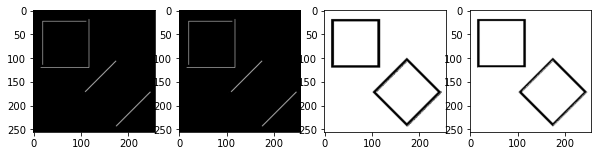

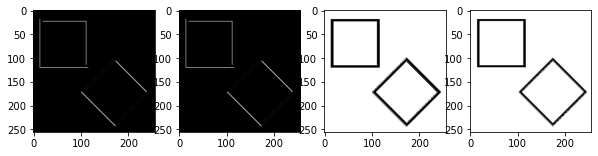

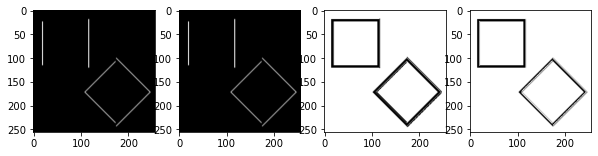

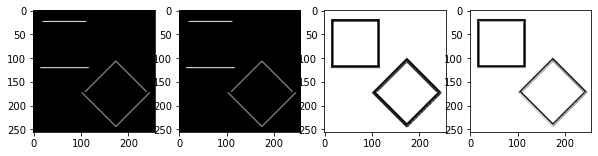

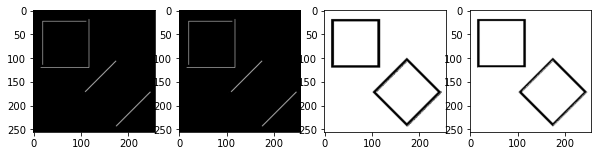

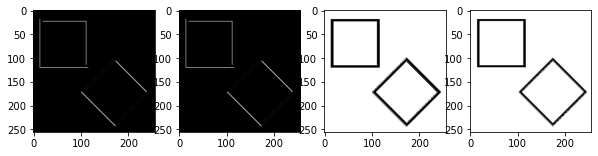

In [126]:
calculateLap(imgKw,R1)
calculateLap(imgKw,R2)
calculateLap(imgKw,P1)
calculateLap(imgKw,P2)
calculateLap(imgKw,S1)
calculateLap(imgKw,S2)

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



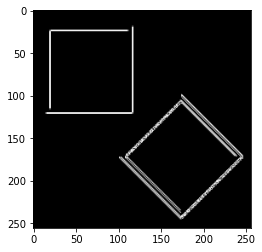

In [193]:
OW = (cv2.filter2D(imgKw,-1,S1)**2 + cv2.filter2D(imgKw,-1,S2)**2)**0.5
plt.imshow(OW)

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

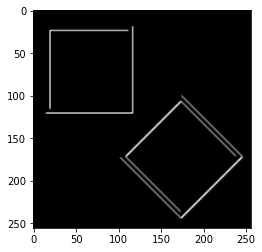

In [204]:
OW2 = abs(cv2.filter2D(imgKw,-1,S1) + cv2.filter2D(imgKw,-1,S2))
plt.imshow(OW2)

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

<Figure size 432x288 with 0 Axes>

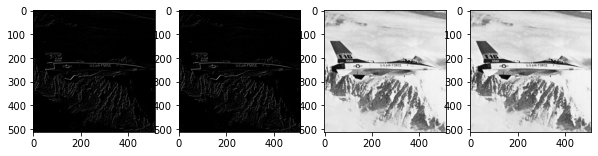

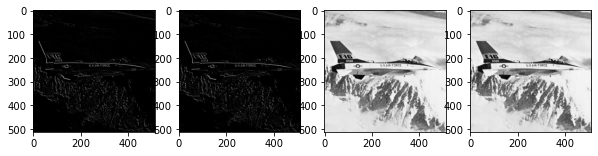

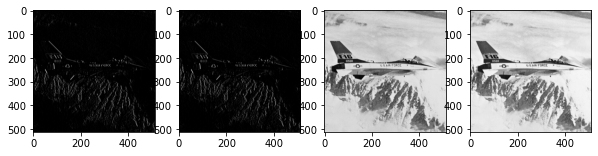

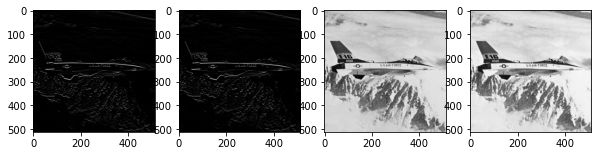

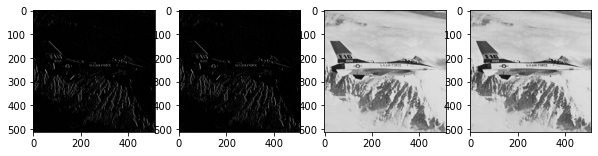

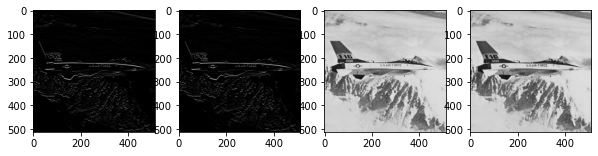

In [171]:
imgJet = cv2.imread('jet.png')           
imgJet = cv2.cvtColor(imgJet, cv2.COLOR_BGR2GRAY)
plt.gray()

calculateLap(imgJet,R1)
calculateLap(imgJet,R2)
calculateLap(imgJet,P1)
calculateLap(imgJet,P2)
calculateLap(imgJet,S1)
calculateLap(imgJet,S2)

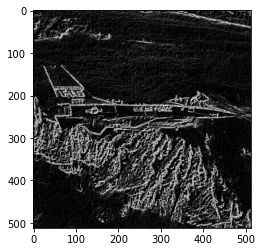

In [206]:
OWJet = (cv2.filter2D(imgJet,-1,S1)**2 + cv2.filter2D(imgJet,-1,S2)**2)**0.5
plt.imshow(OWJet)

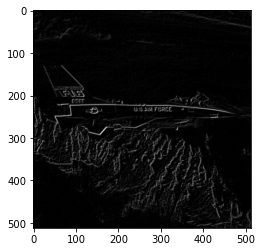

In [205]:
OW2 = abs(cv2.filter2D(imgJet,-1,S1)+ cv2.filter2D(imgJet,-1,S2))
plt.imshow(OW2)